# load dataset

In [1]:
from tqdm import trange, tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("Barwon.csv",parse_dates=["Date"])

In [3]:
dataset.head()

,Date,Conductivity,PH,Turbidity,Temperature,Discharge
0,2010-07-07 00:00:00+10:00,2145.0,7.70,6.6,9.9,NaN
1,2010-07-08 00:00:00+10:00,2141.0,7.74,5.9,10.1,NaN
2,2010-07-09 00:00:00+10:00,2157.0,7.78,6.2,10.0,NaN
3,2010-07-10 00:00:00+10:00,2170.0,7.85,7.4,10.1,NaN
4,2010-07-11 00:00:00+10:00,2185.0,7.75,8.6,10.2,NaN


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype                                
---  ------        --------------  -----                                
 0   Date          3960 non-null   datetime64[ns, pytz.FixedOffset(600)]
 1   Conductivity  3719 non-null   float64                              
 2   PH            3531 non-null   float64                              
 3   Turbidity     3568 non-null   float64                              
 4   Temperature   3723 non-null   float64                              
 5   Discharge     3767 non-null   float64                              
dtypes: datetime64[ns, pytz.FixedOffset(600)](1), float64(5)
memory usage: 185.8 KB


In [5]:
# set datetime index
dataset.index = dataset.Date.copy()

In [6]:
# drop NaN
dataset.dropna(inplace=True)

In [7]:
# Normalize
dataset['PH_norm'] = (dataset.PH - dataset.PH.mean())/dataset.PH.std()
dataset['Conduct_norm'] = (dataset.Conductivity - dataset.Conductivity.mean())/dataset.Conductivity.std()
dataset['Temp_norm'] = (dataset.Temperature - dataset.Temperature.mean())/dataset.Temperature.std()
dataset['Turb_norm'] = (dataset.Turbidity - dataset.Turbidity.mean())/dataset.Turbidity.std()

In [8]:
dataset.drop(dataset[abs(dataset['PH_norm']) > 1.96].index, inplace = True)
dataset.drop(dataset[abs(dataset['Conduct_norm']) > 1.96].index, inplace = True)
dataset.drop(dataset[abs(dataset['Temp_norm']) > 1.96].index, inplace = True)
dataset.drop(dataset[abs(dataset['Turb_norm']) > 1.96].index, inplace = True)

In [9]:
dataset.head()

,Date,Conductivity,PH,Turbidity,Temperature,Discharge,PH_norm,Conduct_norm,Temp_norm,Turb_norm
Date,,,,,,,,,,
2011-04-14 00:00:00+10:00,2011-04-14 00:00:00+10:00,2272.0,7.74,14.0,16.5,2.436,-0.030582,0.494042,0.043004,-0.413819
2011-04-15 00:00:00+10:00,2011-04-15 00:00:00+10:00,2322.0,7.78,13.4,16.5,2.415,0.075752,0.563958,0.043004,-0.435615
2011-04-16 00:00:00+10:00,2011-04-16 00:00:00+10:00,2377.0,7.83,14.3,16.5,1.856,0.208669,0.640865,0.043004,-0.402921
2011-04-17 00:00:00+10:00,2011-04-17 00:00:00+10:00,2430.0,7.85,16.4,16.5,1.535,0.261836,0.714976,0.043004,-0.326635
2011-04-18 00:00:00+10:00,2011-04-18 00:00:00+10:00,2482.0,7.86,16.6,16.6,1.369,0.288419,0.787689,0.063128,-0.319370


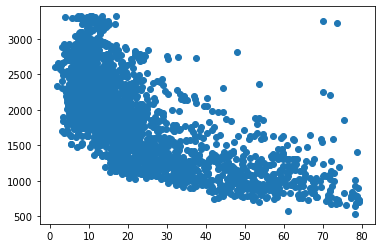

In [10]:
plt.scatter(dataset.Turbidity, dataset.Conductivity)

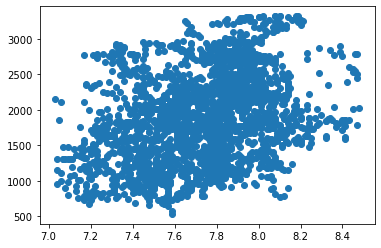

In [11]:
plt.scatter(dataset.PH, dataset.Conductivity)

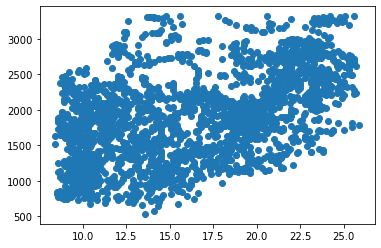

In [12]:
plt.scatter(dataset.Temperature, dataset.Conductivity)

<AxesSubplot:xlabel='Date'>

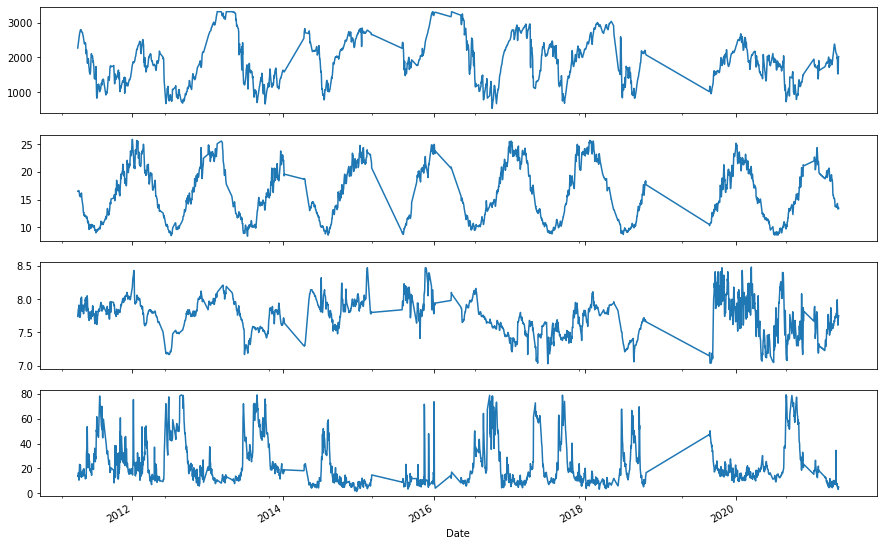

In [13]:
fig, axes = plt.subplots(nrows=4, ncols=1, sharex=True)
fig.set_figheight(10)
fig.set_figwidth(15)
dataset.Conductivity.plot(ax=axes[0])
dataset.Temperature.plot(ax=axes[1])
dataset.PH.plot(ax=axes[2])
dataset.Turbidity.plot(ax=axes[3])

<AxesSubplot:>

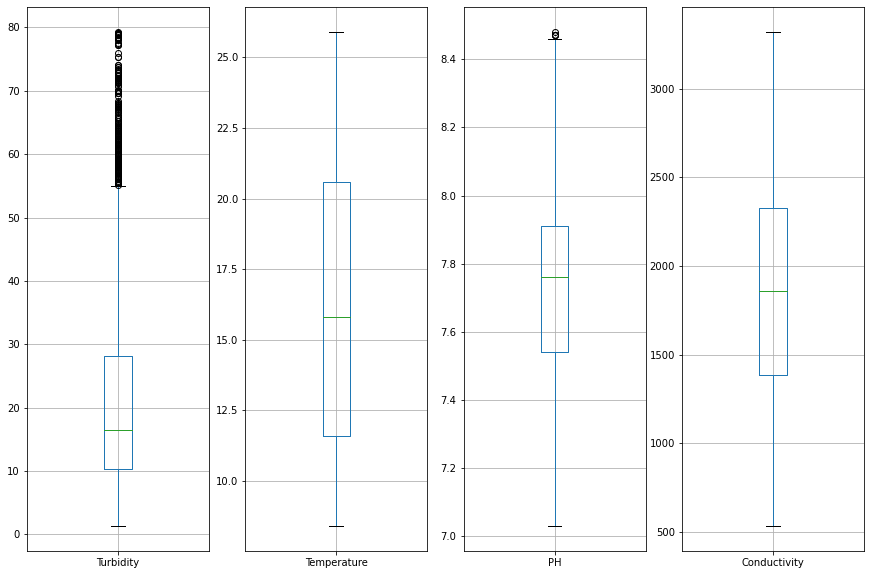

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=4)
fig.set_figheight(10)
fig.set_figwidth(15)
dataset.boxplot(column="Turbidity", ax=axes[0])
dataset.boxplot(column="Temperature", ax=axes[1])
dataset.boxplot(column="PH", ax=axes[2])
dataset.boxplot(column="Conductivity", ax=axes[3])

<AxesSubplot:xlabel='Date'>

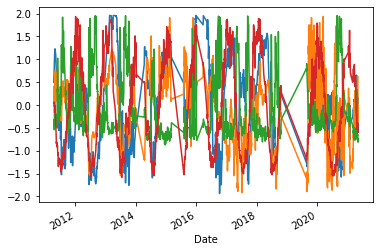

In [15]:
dataset.Conduct_norm.plot()
dataset.PH_norm.plot()
dataset.Turb_norm.plot()
dataset.Temp_norm.plot()

# split

In [16]:
import torch

In [17]:
X = dataset[["PH_norm", "Temp_norm", "Turb_norm"]]
y = dataset.Conduct_norm

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [20]:
X_train = torch.from_numpy(X_train.to_numpy()).type(torch.FloatTensor)
y_train = torch.from_numpy(y_train.to_numpy()).type(torch.FloatTensor)
X_test = torch.from_numpy(X_test.to_numpy()).type(torch.FloatTensor)
y_test = torch.from_numpy(y_test.to_numpy()).type(torch.FloatTensor)

## prepare data for training

In [21]:
import os
import torch
from torch import nn
import torch.nn.functional as F

PyTorch provides DataLoader and Dataset to decouple dataset code from model training code. Dataset stores the samples and their labels. DataLoader runs iterations on a specifed number of samples to enable easy access to samples (Source: Pytorch.org)

In [22]:
from torch.utils.data import Dataset, DataLoader

In [23]:
class TheDataset(Dataset):
    #initialize the directory for X and y
    def __init__(self, X, y):
        self.X = X
        self.y = y
    #len returns the number of samples
    def __len__(self):
        return self.X.shape[0]
    #getitem loads and returns a sample at a given index idx - also converts the samples into tensor form
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [24]:
train_ds = TheDataset(X_train, y_train)
test_ds = TheDataset(X_test, y_test)

Dataset retrieves dataset one sample at a time. However, when we train our model, we want to pass samples in batch_size then reshuffle data at every epoch to reduce model overfitting 

In [25]:
BATCH_SIZE = 10
train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_ds, batch_size=BATCH_SIZE, shuffle=True)

## build model

In [26]:
baseline_model = torch.nn.Sequential(
    torch.nn.Linear(3, 15),
    torch.nn.Tanh(),
    torch.nn.Linear(15, 10),
    torch.nn.Tanh(),
    torch.nn.Linear(10, 5),
    torch.nn.Tanh(),
    torch.nn.Linear(5, 1)
)

In [27]:
loss_fn = torch.nn.MSELoss(reduction='mean')
optimizer = torch.optim.RMSprop(baseline_model.parameters(), lr=1e-3)

In [28]:
def train_model(model, loss_fn, optimizer, train_dl):
    total = 0
    sum_loss = 0
    for index, (feats,target) in enumerate(train_dl):
    #to make sure DataLoader passes all data in dataset
        pred = model(feats)
        losses = loss_fn(pred.squeeze(), target)
        optimizer.zero_grad()
        losses.backward()
        optimizer.step()
        batch_size = feats.shape[0]
        total += batch_size
        sum_loss += batch_size*losses.item()
    return sum_loss/total

In [29]:
def train_loop(model, loss_fn, optim, epochs, train_dl):
    t = trange(epochs, desc='Bar desc', leave=True)
    #to show smart progress meter
    for i in t:
        loss = train_model(model, loss_fn, optim, train_dl)
        if i % 10 == 0:
               t.set_description(f"loss = {loss}", refresh=True)

In [30]:
#Show progress meter that represents loss throughout 100 epochs
train_loop(baseline_model, loss_fn, optimizer, 100, train_loader)

loss = 0.2621553582530625: 100%|██████████| 100/100 [00:36<00:00,  2.77it/s]


- [x] get parameters
- [x] calculate residuals
- [x] bootstrapping residuals
- [x] generate new synthetic datasets from sampled residuals
- [x] estimate parameters for each model trained on each new synthetic dataset
- [x] aggregate all parameters from all models
- [x] Calculate covariance and means of these all parameters
- [x] MCMC from this covariance and means to more sets of parameters
- [x] create models from these set of parameters, validate on test set
- [x] plot uncertainty of output

In [31]:
baseline_model.eval()
#Calculate residuals to prepare for resampling
residuals = y_train - baseline_model(X_train).squeeze()

In [32]:
residuals.shape

torch.Size([1904])

### residual bootstrapping

In [33]:
from sklearn.utils import resample

In [34]:
bootstrap_residuals = []
for i in range(300):
#given the set of residuals we replace and shuffle values within the set
    bootstrap_residual = resample(residuals.detach(), n_samples=residuals.shape[0], replace=True)
    bootstrap_residuals.append(bootstrap_residual)

## generate synthetic dataset

In [35]:
synthetic_datasets = []
for bootstrap_residual in bootstrap_residuals:
    synthetic_y = baseline_model(X_train).squeeze().detach() + bootstrap_residual
    synthetic_datasets.append({"feats": X_train, "target": synthetic_y})

In [36]:
list(baseline_model.parameters())

[Parameter containing:
 tensor([[ 0.1411, -0.6152,  0.2307],
         [ 0.0383, -0.2015, -0.5115],
         [-0.0855, -0.3521, -1.1127],
         [-0.8209,  1.2999,  0.5585],
         [-0.4396, -0.2931,  0.0071],
         [ 0.6743, -0.5432, -0.8239],
         [ 0.0964,  0.6620, -0.1477],
         [-0.6720,  0.3989, -0.4090],
         [ 0.6935, -0.0591,  1.1845],
         [ 0.3215,  0.3616, -0.9759],
         [-0.0156,  0.5779,  0.2105],
         [ 0.2965, -0.0906, -0.5904],
         [ 1.0610,  0.1840, -0.4160],
         [-0.4549,  0.4168, -0.4715],
         [-0.2043, -0.3585, -0.0611]], requires_grad=True),
 Parameter containing:
 tensor([ 0.5906, -0.2905, -0.2340,  0.4307, -0.2041, -0.3199, -0.5723,  0.4488,
         -0.0397, -0.5700, -0.5324, -0.4769, -0.6047,  0.0065,  0.0710],
        requires_grad=True),
 Parameter containing:
 tensor([[-3.9770e-01,  3.8542e-02, -4.0802e-01,  7.4968e-01, -3.9754e-01,
          -3.3876e-01,  4.2409e-01, -4.2169e-02,  2.0911e-01,  6.0597e-01,
      

## train synthetic models

In [37]:
synthetic_models = []
for synthetic_dataset in synthetic_datasets:
    feats = synthetic_dataset["feats"]
    target = synthetic_dataset["target"]
    train_dl = DataLoader(TheDataset(feats, target), batch_size=BATCH_SIZE, shuffle=True)
    model = torch.nn.Sequential(
    torch.nn.Linear(3, 15),
    torch.nn.Tanh(),
    torch.nn.Linear(15, 10),
    torch.nn.Tanh(),
    torch.nn.Linear(10, 5),
    torch.nn.Tanh(),
    torch.nn.Linear(5, 1)
    )
    loss_fn = torch.nn.MSELoss(reduction='mean')
    optimizer = torch.optim.RMSprop(baseline_model.parameters(), lr=1e-3)
    train_loop(model, loss_fn, optimizer, 100, train_dl)
    synthetic_models.append(model)

00:00,  3.20it/s]
loss = 1.0068617748926167: 100%|██████████| 100/100 [00:37<00:00,  2.68it/s]


In [38]:
for synthetic_model in synthetic_models:
    #to make sure the model works for both test and train datasets
    synthetic_model.eval()

In [39]:
list(synthetic_models[0].parameters())

[Parameter containing:
 tensor([[ 4.7672e-01,  3.3399e-01,  4.6772e-01],
         [-1.4458e-01,  2.7753e-01,  1.1723e-02],
         [-2.6150e-01,  4.7829e-01,  8.1519e-03],
         [-3.2568e-01, -3.8796e-01,  3.3916e-02],
         [ 3.5181e-01, -2.2234e-02, -3.8971e-01],
         [-2.9102e-01, -3.2080e-01,  4.8818e-01],
         [ 4.9659e-01,  3.8287e-01,  3.3817e-01],
         [ 2.1878e-01, -3.4014e-02, -1.8178e-01],
         [ 2.8567e-01, -5.5360e-01,  1.2542e-01],
         [ 9.4794e-02, -3.9000e-01,  5.4272e-01],
         [-1.1178e-01, -5.2319e-01, -1.4153e-01],
         [ 1.2903e-01,  2.2202e-01,  5.1664e-01],
         [-3.2288e-01, -5.3908e-01, -8.9741e-02],
         [-4.5615e-01,  1.5318e-04, -4.2007e-01],
         [-2.2974e-01, -4.1415e-01,  2.8972e-01]], requires_grad=True),
 Parameter containing:
 tensor([-0.1811,  0.4971,  0.2782, -0.4479,  0.0606, -0.3079,  0.2464,  0.4819,
         -0.0235, -0.0682, -0.0015,  0.1568, -0.4128,  0.4848, -0.3134],
        requires_grad=True),

## aggregate parameters from trained synthetic models

In [40]:
#Create a list
parameter_structure = []
for index, module in enumerate(baseline_model.modules()):
#keep parameters of linear layers only
#nelement is the total number of elements in the matrix
    if not isinstance(module, (nn.Sequential, nn.Tanh)):
        parameter_structure.append({"index": index-1, "type": "weight", "size": module.weight.size(), "nelement": module.weight.nelement()})
        parameter_structure.append({"index": index-1, "type": "bias", "size": module.bias.size(), "nelement": module.bias.nelement()})

In [41]:
parameter_structure

[{'index': 0, 'type': 'weight', 'size': torch.Size([15, 3]), 'nelement': 45},
 {'index': 0, 'type': 'bias', 'size': torch.Size([15]), 'nelement': 15},
 {'index': 2, 'type': 'weight', 'size': torch.Size([10, 15]), 'nelement': 150},
 {'index': 2, 'type': 'bias', 'size': torch.Size([10]), 'nelement': 10},
 {'index': 4, 'type': 'weight', 'size': torch.Size([5, 10]), 'nelement': 50},
 {'index': 4, 'type': 'bias', 'size': torch.Size([5]), 'nelement': 5},
 {'index': 6, 'type': 'weight', 'size': torch.Size([1, 5]), 'nelement': 5},
 {'index': 6, 'type': 'bias', 'size': torch.Size([1]), 'nelement': 1}]

In [42]:
aggregated_params = []
for synthetic_model in synthetic_models:
    #detach parameters into new tensors
    params = [p.detach() for p in synthetic_model.parameters()]
    #cat combines sequence of tensors while reshape(-1) returns a tensor with 1 row only
    concat_params = torch.cat([p.reshape(-1) for p in params])
    aggregated_params.append(concat_params)

In [43]:
aggregated_params[0]

tensor([ 4.7672e-01,  3.3399e-01,  4.6772e-01, -1.4458e-01,  2.7753e-01,
         1.1723e-02, -2.6150e-01,  4.7829e-01,  8.1519e-03, -3.2568e-01,
        -3.8796e-01,  3.3916e-02,  3.5181e-01, -2.2234e-02, -3.8971e-01,
        -2.9102e-01, -3.2080e-01,  4.8818e-01,  4.9659e-01,  3.8287e-01,
         3.3817e-01,  2.1878e-01, -3.4014e-02, -1.8178e-01,  2.8567e-01,
        -5.5360e-01,  1.2542e-01,  9.4794e-02, -3.9000e-01,  5.4272e-01,
        -1.1178e-01, -5.2319e-01, -1.4153e-01,  1.2903e-01,  2.2202e-01,
         5.1664e-01, -3.2288e-01, -5.3908e-01, -8.9741e-02, -4.5615e-01,
         1.5318e-04, -4.2007e-01, -2.2974e-01, -4.1415e-01,  2.8972e-01,
        -1.8105e-01,  4.9715e-01,  2.7816e-01, -4.4786e-01,  6.0616e-02,
        -3.0788e-01,  2.4641e-01,  4.8189e-01, -2.3531e-02, -6.8225e-02,
        -1.5266e-03,  1.5678e-01, -4.1275e-01,  4.8478e-01, -3.1339e-01,
         4.6572e-02, -8.9970e-04,  1.9745e-01,  8.2630e-02, -6.9635e-02,
        -1.5719e-01,  1.1928e-01,  2.2361e-01,  3.2

In [44]:
#stack all tensors
all_params = torch.vstack(aggregated_params)

## calculate means and covariance matrix of synthetic parameters, create multivariate normal distribution and random sampling 100 sets of parameters

In [45]:
means = np.mean(all_params.numpy(), axis=0)

In [46]:
#convert tensor to numpy array
cov_mat = np.cov(all_params.numpy().T)

In [47]:
from scipy.stats import multivariate_normal

In [48]:
params_dist = multivariate_normal(mean=means, cov=cov_mat)

In [49]:
#create 100 mc simulations from the distribution
mc_params = params_dist.rvs(size=100)

In [50]:
#returns the desired type
mc_params = torch.Tensor(mc_params).type(torch.float32)

In [51]:
mc_params

tensor([[-0.1438, -0.2389,  0.0916,  ...,  0.3987,  0.0135, -0.2281],
        [-0.4514, -0.0456,  0.3206,  ...,  0.0513,  0.3275,  0.0665],
        [ 0.0609, -0.1885,  0.3997,  ..., -0.0506, -0.1766,  0.1569],
        ...,
        [ 0.0074,  0.3371,  0.5651,  ..., -0.0644, -0.1698,  0.2651],
        [ 0.3499,  0.4590,  0.6475,  ...,  0.1794, -0.2015, -0.0047],
        [ 0.1045,  0.2757,  0.4513,  ...,  0.0572, -0.0924, -0.1716]])

## create models with MC generated sets of params

In [52]:
mc_model = torch.nn.Sequential(
    torch.nn.Linear(3, 15),
    torch.nn.Tanh(),
    torch.nn.Linear(15, 10),
    torch.nn.Tanh(),
    torch.nn.Linear(10, 5),
    torch.nn.Tanh(),
    torch.nn.Linear(5, 1)
)


In [53]:
mc_models = []
for params in mc_params:
    mc_model = torch.nn.Sequential(
    torch.nn.Linear(3, 15),
    torch.nn.Tanh(),
    torch.nn.Linear(15, 10),
    torch.nn.Tanh(),
    torch.nn.Linear(10, 5),
    torch.nn.Tanh(),
    torch.nn.Linear(5, 1)
    )
    # assign params
    index = 0
    for param_struct in parameter_structure:
        layer_index = param_struct["index"]
        param_type = param_struct["type"]
        param_size = param_struct["size"]
        nelement = param_struct["nelement"]
        nelement = index + nelement
        #after we retrieve params for one layer to  put into one row, we retrieve the next params of next layer to put in the same row 
        param = params[index:nelement].reshape(param_size)
        model_layer = mc_model[layer_index]
        setattr(model_layer, param_type, nn.Parameter(param))
        index = nelement
    mc_models.append(mc_model)

In [54]:
len(mc_models)

100

# Uncertainty boxplot

In [55]:
#use test data to predict using MC models
mc_predictions = []
for mc_model in mc_models:
    mc_model.eval()
    mc_prediction = mc_model(X_test).squeeze()
    mc_predictions.append(mc_prediction)

In [56]:
mc_predictions = torch.vstack(mc_predictions)

In [57]:
mc_predictions = mc_predictions.detach().numpy()

In [58]:
mc_predictions = pd.DataFrame(mc_predictions)

In [59]:
mc_predictions

,0,1,2,3,4,5,6,7,8,9,...,625,626,627,628,629,630,631,632,633,634
0,-0.353123,-0.368388,-0.383796,-0.364428,-0.384446,-0.388842,-0.360825,-0.358280,-0.358485,-0.367505,...,-0.393182,-0.363409,-0.371731,-0.362545,-0.375929,-0.381945,-0.371797,-0.362495,-0.354420,-0.361585
1,-0.063973,-0.024958,-0.016233,-0.026055,-0.010356,-0.007312,-0.007556,-0.063595,-0.047979,-0.012534,...,0.003053,-0.069845,-0.018433,-0.015573,-0.011248,-0.015304,-0.010657,-0.066077,-0.064593,-0.064971
2,0.183968,0.198576,0.186547,0.196788,0.192491,0.187720,0.192764,0.195366,0.196060,0.199438,...,0.184889,0.189455,0.191887,0.198662,0.194654,0.179126,0.196612,0.188180,0.193114,0.188499
3,-0.152651,-0.130685,-0.109181,-0.157065,-0.116755,-0.115036,-0.222412,-0.113366,-0.143376,-0.140182,...,-0.133437,-0.097226,-0.140630,-0.160723,-0.138009,-0.141503,-0.161510,-0.120378,-0.138686,-0.114317
4,-0.523554,-0.475819,-0.458214,-0.476429,-0.455337,-0.449854,-0.465984,-0.503282,-0.486212,-0.472015,...,-0.447962,-0.508284,-0.476809,-0.470069,-0.468712,-0.468076,-0.471515,-0.525608,-0.506923,-0.509590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.163811,-0.210665,-0.317092,-0.231783,-0.315070,-0.333054,-0.252455,-0.142828,-0.191508,-0.215851,...,-0.352674,-0.133936,-0.277354,-0.222566,-0.285309,-0.342226,-0.264471,-0.135329,-0.159007,-0.149077
96,-0.037885,0.294475,0.061975,0.129478,0.113023,0.065628,0.106949,0.175753,0.153892,0.320753,...,0.002324,0.124495,-0.003434,0.239761,0.052961,-0.041638,0.075109,-0.011021,0.078873,0.032537
97,0.383724,0.254294,0.274230,0.285160,0.255789,0.260569,0.271728,0.340220,0.306825,0.241955,...,0.270997,0.354653,0.306515,0.259022,0.282103,0.312369,0.279963,0.385532,0.352615,0.363393
98,-0.100131,-0.045362,-0.040518,-0.070703,-0.041023,-0.035855,-0.101029,-0.059996,-0.067465,-0.047310,...,-0.036494,-0.050571,-0.071571,-0.064691,-0.062658,-0.051946,-0.073528,-0.081320,-0.081345,-0.065918


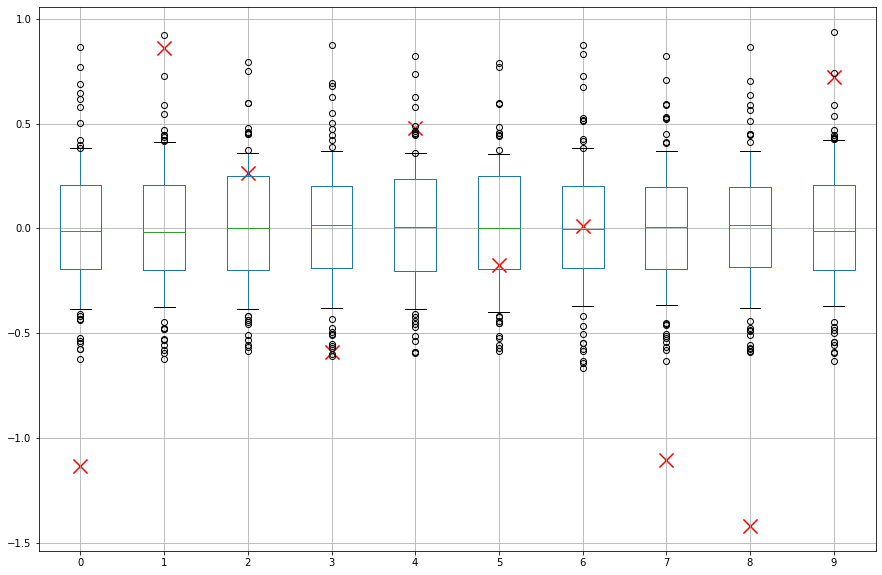

In [60]:
ax = plt.subplot()
ax.figure.set_figwidth(15)
ax.figure.set_figheight(10)
#plot 10th-90th percentile of the first 10 values in test data
mc_predictions.boxplot(figsize=(20, 20), column=list(range(10)), ax=ax, whis=(10, 90))
ax.scatter(range(1,11), y_test[:10], marker="x", c="r", s=200)

In [ ]:
#Denormalize y for further plotting
mc_predictions = np.array(mc_predictions)
conduct_std = np.std(dataset.Conductivity)
conduct_mean = np.mean(dataset.Conductivity)
mc_predictions = mc_predictions * conduct_std + conduct_mean
mc_predictions = pd.DataFrame(mc_predictions)